In [1]:
import pandas as pd

In [2]:
CSV_COLS = ('Airline','Airline ID','Dep_Airport','DAP_ID','Arr_Airport','ARA_ID','Codeshare','Stops','Equipment')

In [3]:
routes = pd.read_csv('routes.csv', names=CSV_COLS,
                     na_values=['\\N'], sep=';')

The data obtained from openflights.org are all in a singular column without headings.
As such, I've had to manually input the headings and indicate how they were seprated.
I have changed the ':' to a ';' in excel using the find and replace function so that it could be read in python.

In [4]:
routes.head(4)

,Airline,Airline ID,Dep_Airport,DAP_ID,Arr_Airport,ARA_ID,Codeshare,Stops,Equipment
0,2B,410.0,AER,2965.0,KZN,2990.0,NaN,0,CR2
1,2B,410.0,ASF,2966.0,KZN,2990.0,NaN,0,CR2
2,2B,410.0,ASF,2966.0,MRV,2962.0,NaN,0,CR2
3,2B,410.0,CEK,2968.0,KZN,2990.0,NaN,0,CR2


The 'routes' dataset from openflights only contains the codes and ID for the airports but no coordinates.
I have then downloaded the airports dataset from openflights and named the columns as I did for 'routes'

Airport_COLS = ('Airport ID','Name','City','Country','IATA','ICAO', 'Lat','Lon','Altitude','Timezone','DST','TZ Database','Type','Source')

airports = pd.read_csv('airports.csv', names=Airport_COLS, na_values=['\\N'], sep=';')
airports.head(4)

airports = airports.drop(['City','Country','IATA','ICAO','Altitude','Timezone',
                          'DST','TZ Database','Type','Source'],axis=1)
#this deletes the columns that are not needed and tidies the dataset up 

airports.info()

airports.to_csv('airports2.csv')

I have run these lines of codes previously and seperately

From the information on airports we can see that some coordinates are missing. The dataset is saved as a csv file in order to more easily sort the missing coordinates.

When I sorted the lat and lon columns in excel I found that some of the coordinates were also letters and not proper coordinates. Due to limited time I could not find the correct coordinates for these airports and just deleted them in excel. The new file is then saved and opened in the notebook again, overwriting the original 'airports' dataset.

In [5]:
Airport_COLS = ('Airport ID','Name','Lat','Lon')

In [6]:
import numpy as np

In [7]:
airports = pd.read_csv('airports2.csv', names=Airport_COLS, encoding='latin-1')

In [8]:
airports.head(4)

,Airport ID,Name,Lat,Lon
0,9124,McMurdo Station Pegasus Field,-77.963402,166.524994
1,2038,Williams Field,-77.867401,167.057007
2,7947,McMurdo Station Ice Runway,-77.853996,166.468994
3,7578,Wilkins Runway,-66.690833,111.523611


In [9]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 4 columns):
Airport ID    7097 non-null int64
Name          7097 non-null object
Lat           7097 non-null float64
Lon           7097 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 221.9+ KB


In [10]:
routes.info()
# can see that some airports are missing ID's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
Airline        67663 non-null object
Airline ID     67184 non-null float64
Dep_Airport    67663 non-null object
DAP_ID         67443 non-null float64
Arr_Airport    67663 non-null object
ARA_ID         67442 non-null float64
Codeshare      14597 non-null object
Stops          67663 non-null int64
Equipment      67645 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 4.6+ MB


In [11]:
routes = routes[np.isfinite(routes['DAP_ID'])]

In [12]:
routes = routes[np.isfinite(routes['ARA_ID'])]
# The above two lines of code deletes the rows in 'routes' that have null values

In [13]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67240 entries, 0 to 67662
Data columns (total 9 columns):
Airline        67240 non-null object
Airline ID     66765 non-null float64
Dep_Airport    67240 non-null object
DAP_ID         67240 non-null float64
Arr_Airport    67240 non-null object
ARA_ID         67240 non-null float64
Codeshare      14565 non-null object
Stops          67240 non-null int64
Equipment      67222 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 5.1+ MB


In [14]:
del routes['Airline']
del routes['Airline ID']
del routes['Codeshare']
del routes['Equipment']
del routes['Stops']
# Again, this deletes columns in 'routes' that are not needed and tidies up the dataset

In [15]:
def update_type(t1, t2):
    return t1.map(t2)
# this function assigns a lat and lon column for the departure and arrival airports based on their airport ID.

In [16]:
routes['Dep_Lat'] = update_type(routes.DAP_ID,
            airports.set_index('Airport ID').Lat)

routes['Dep_Lon'] = update_type(routes.DAP_ID,
            airports.set_index('Airport ID').Lon)

routes['Arr_Lat'] = update_type(routes.ARA_ID,
            airports.set_index('Airport ID').Lat)

routes['Arr_Lon'] = update_type(routes.ARA_ID,
            airports.set_index('Airport ID').Lon)

In [17]:
routes.head(2)

,Dep_Airport,DAP_ID,Arr_Airport,ARA_ID,Dep_Lat,Dep_Lon,Arr_Lat,Arr_Lon
0,AER,2965.0,KZN,2990.0,43.449902,39.956600,55.606201,49.278702
1,ASF,2966.0,KZN,2990.0,46.283298,48.006302,55.606201,49.278702


In [18]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67240 entries, 0 to 67662
Data columns (total 8 columns):
Dep_Airport    67240 non-null object
DAP_ID         67240 non-null float64
Arr_Airport    67240 non-null object
ARA_ID         67240 non-null float64
Dep_Lat        64995 non-null float64
Dep_Lon        64995 non-null float64
Arr_Lat        64996 non-null float64
Arr_Lon        64996 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.6+ MB


There are still null values in the coordinates columns so they are deleted and checked so that the code can run smoothly

In [19]:
routes = routes[np.isfinite(routes['Arr_Lon'])]

In [20]:
routes = routes[np.isfinite(routes['Arr_Lat'])]

In [21]:
routes = routes[np.isfinite(routes['Dep_Lat'])]
routes = routes[np.isfinite(routes['Dep_Lon'])]

In [22]:
routes.isnull().any()

Dep_Airport    False
DAP_ID         False
Arr_Airport    False
ARA_ID         False
Dep_Lat        False
Dep_Lon        False
Arr_Lat        False
Arr_Lon        False
dtype: bool

In [23]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62873 entries, 0 to 67662
Data columns (total 8 columns):
Dep_Airport    62873 non-null object
DAP_ID         62873 non-null float64
Arr_Airport    62873 non-null object
ARA_ID         62873 non-null float64
Dep_Lat        62873 non-null float64
Dep_Lon        62873 non-null float64
Arr_Lat        62873 non-null float64
Arr_Lon        62873 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ MB


In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm

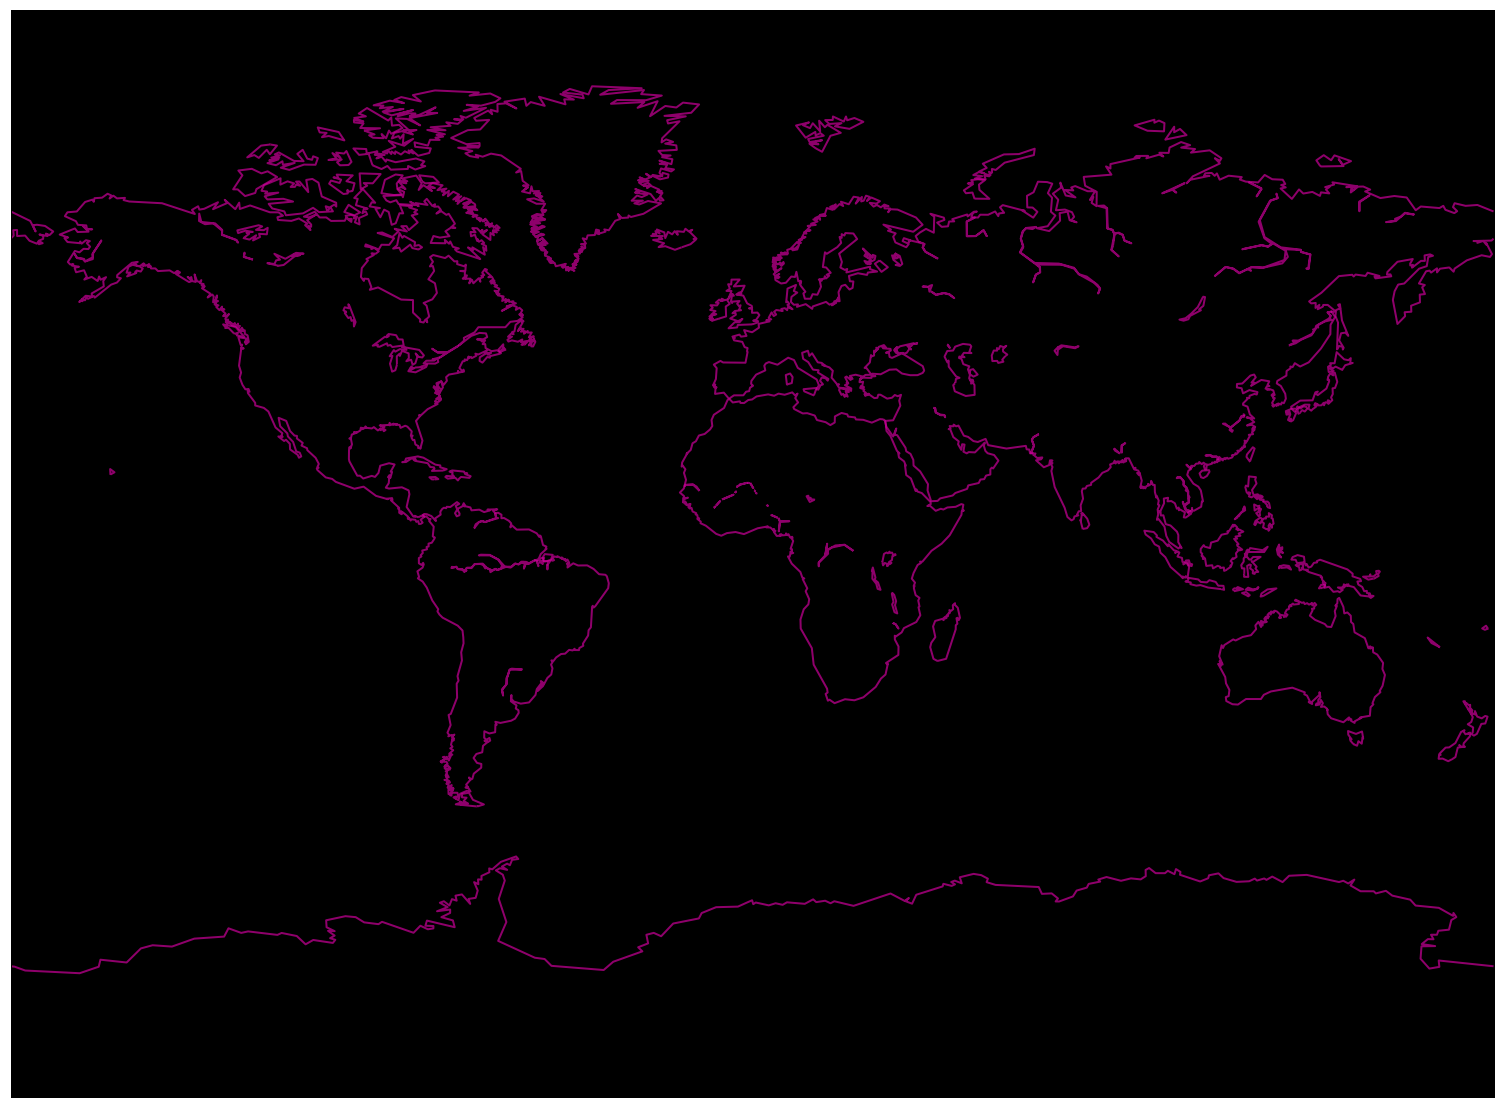

In [25]:
# create the map and draw country boundaries
plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines(color=(204/255.0, 0, 153/255.0, 0.7), linewidth=2.0)
m.fillcontinents(color=(0.0, 0.0, 0, 1.0), lake_color=(0.0, 0.0, 0, 1.0))
m.drawmapboundary(fill_color=(0.0, 0.0, 0, 1.0))

plt.show()

In [26]:
routes = routes.sample(frac=0.3)
# this code randomly samples 30% of the dataset

I have done this as the original dataset of 62000 routes takes too long to run and the final image looks extremely clutered. For visualisation purposes of this assignment I have only done 30% of the routes to illustrate on the map.

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater


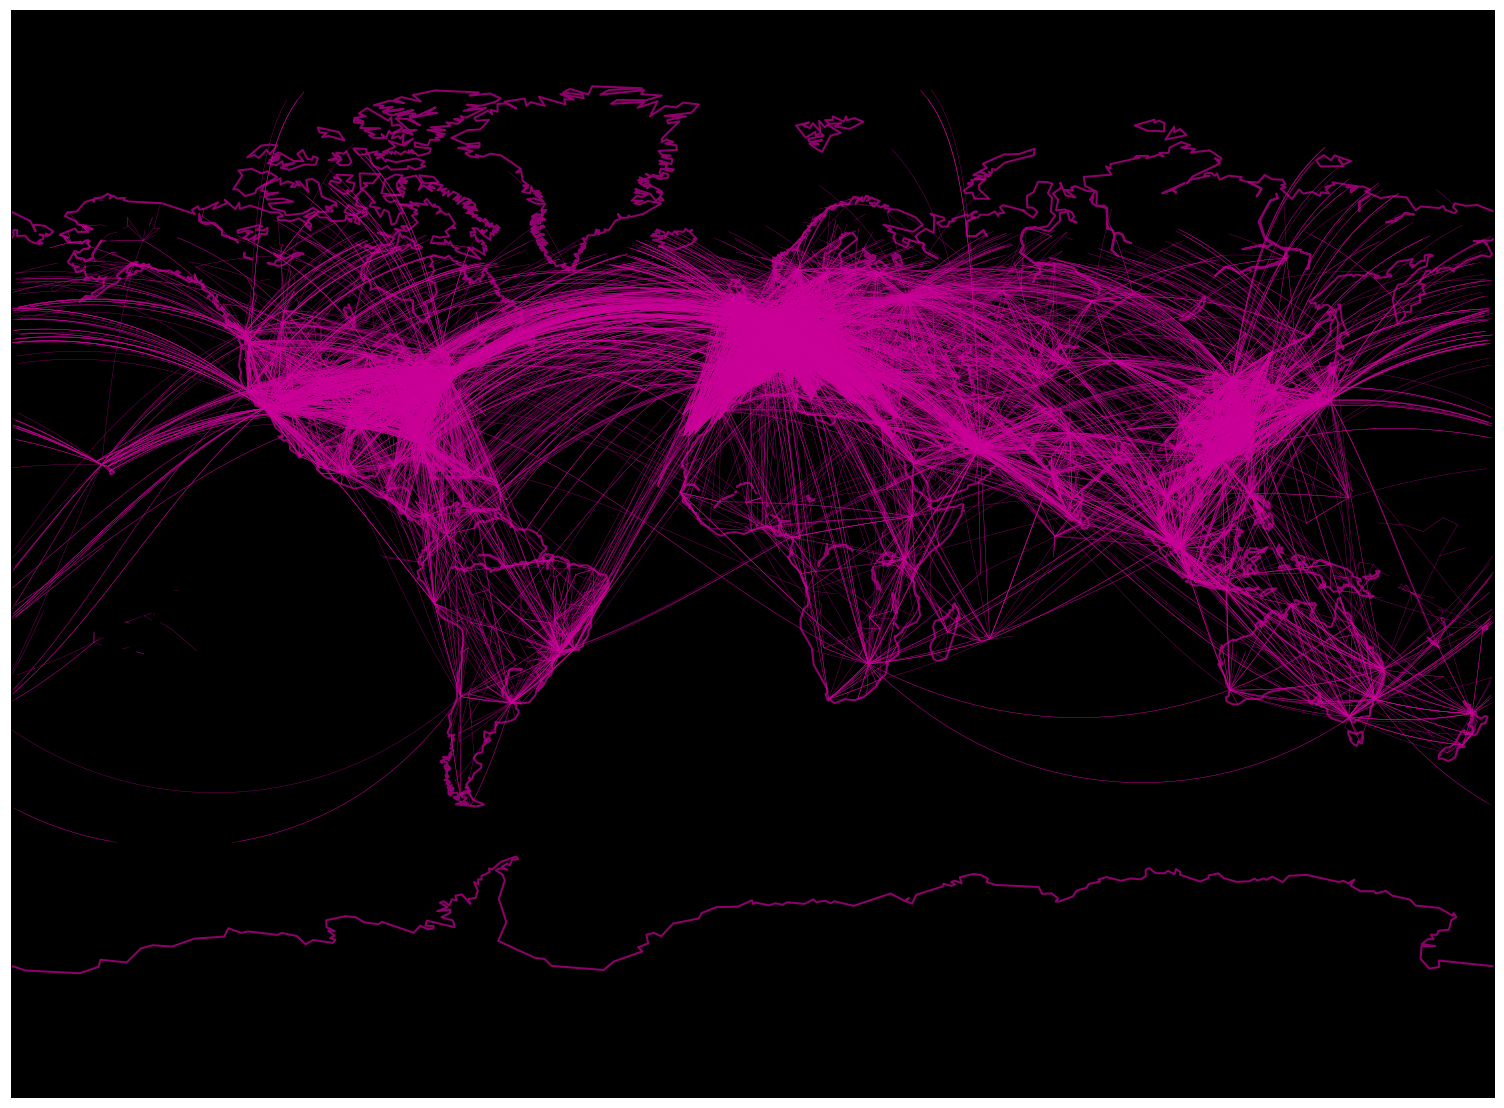

In [27]:
plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines(color=(204/255.0, 0, 153/255.0, 0.7), linewidth=2.0)
m.fillcontinents(color=(0.0, 0.0, 0, 1.0), lake_color=(0.0, 0.0, 0, 1.0))
m.drawmapboundary(fill_color=(0.0, 0.0, 0, 1.0))


for i, route in enumerate(routes.sort_values(by='DAP_ID',
                                             ascending=True).iterrows()):
    route = route[1]
    line, = m.drawgreatcircle(route['Dep_Lon'], route['Dep_Lat'],
                              route['Arr_Lon'], route['Arr_Lat'],
                              color = (204/255.0, 0, 153/255.0, 0.7),
                              linewidth = 0.4)
    
    # if the path wraps the image, basemap plots a nasty line connecting
    # the points at the opposite border of the map.
    # we thus detect path that are bigger than 30km and split them
    # by adding a NaN
    # this code was obtained from 'https://blog.hugo-larcher.com/
    # flight-data-visualisation-with-pandas-and-matplotlib-ebbd13038647'                          

    path = line.get_path()
    
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices


plt.show()